# DSCI 632 Final

Your final is to use the dataset of your choice and the techniques in this class to do the following:

1. Define and describe the dataset (10 points)
1. Clean the data (10 points)
1. Transform the clean data (10 points)
1. Show your analysis of the data (10 points)

## Ground Rules

1. Explain everything you're doing with pyspark in the code cells using [markdown](https://www.markdownguide.org/cheat-sheet) in text cells. Help the reader understand why you're doing each step so they can re-create it. Remember, this is an assignment to show how you analyze data to a potential employer. Don't use code comments to explain things.
1. All of the sections are heading 1 in markdown, so use heading 2 to write your explainations, and heading 3 for any sub-headers. Check in your table of contents view in colab to make sure each point is listed before you turn this in.
1. Don't hesisate to use multiple code/text cells in each section, as long as they're all labeled and described.
1. Assume that the reader doesn't have access to the dataset on your local machine. Provide a link to the dataset you're using, or if able, include code to copy it from a public source. Don't rely on uploading from your local machine. (Importing from Google Drive is ok, as long as you provide the link to the data)
1. If using GCP services, include screenshots from your console if there's a step that you aren't able to re-produce in code. Using the SDK is always preferred, but you won't lose points for using screenshots and explaining them.
1. Import the data ONCE, then transform it to fit your analysis.
1. Don't overwrite data, make new columns for new transformations. You can always drop columns later, but you can't get overwritten values back.
1. Feel free to work with classmates, but all work submitted must be your own.
1. Make sure to run disconnect the runtime and re-run the notebook at least once before turning in. If you are getting certain Java runtime errors, this might also help.

## Extra Credit Opportunities!

- If you provide a link to this notebook on your public GitHub page instead of turning it in as an attachment, you will get 2 points extra credit.
- Extra credit will be given for using the [Google Cloud SDK](https://cloud.google.com/sdk/) to create/use/destroy any cloud resources, up to 2 points per section, 8 points total.
 - Don't be afraid to look at the GCP example colab notebooks from the class notes, the GCP documentation, or GitHub for examples.
- If this notebook is self-contained, you will get 5 points extra credit. (Requirements below)
 - The data is imported without relying on Google Drive, as the paths to data in Google Drive are user-specific. Downloads from public storage buckets/services are fine. (1 point)
 - It be run from start to finish without making any changes to paths, code, or variable names. (1 point)
 - All calls to external services, including GCP, are done programatically, no screenshots explaining how it worked in a browser console. (Using an API or SDK, 2 points)
 - All cloud resources are destroyed at the end of the notebook in a seperate section (Also via API or SDK, 1 point)

---

# Section 1: Define and describe the dataset

10 points

Import the dataset, and describe why you'll be analyzing in it. You can summarize a few columns, show a more information on the relavent features, or but help the reader understand what the dataset is, what is in it, and why you picked it.

Some questions that it might help you to answer:
1. Why are you choosing this dataset?
1. What variables will you use?
1. What analysis(es) will you run?
1. Do you have any hypotheses? What are they?

### This section should include one or more of the following:
- A histogram of several features relavent to your analysis
- The schema of the dataset, with the datatypes assigned correctly
- A text cell with explainations of the relavent features in [markdown](https://www.markdownguide.org/cheat-sheet)
- Use Spark SQL or built-in methods to show a range of values
- Most common words/n-grams found

## Prepare pyspark

In [ ]:
# Install Spark 3.0.1
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz
!tar xf spark-3.0.1-bin-hadoop2.7.tgz

### Set Environment Variables

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop2.7"

### Install required libraries

In [ ]:
!python -m pip install --upgrade pyspark==2.4.0
!python -m pip install -q findspark
!python -m pip install -q ydata_profiling
!python -m pip install -q kaggle
!python -m pip install -q quantulum3
!python -m pip install -q nltk
!python -m pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.4/213.4 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.3/197.3 kB 23.1 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-2.4.0-py2.py3-none-any.whl size=213793582 sha256=b704956e16642c6e1db0af695918a396570632ec15dd0ddcde220e5f4d384993
  Stored in directory: /root/.cache/pip/wheels/f7/6f/a8/4d2c26233a51a570ccf015208651aeed4590ed3f935b70e7c6
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 51.4 MB/s

### init spark

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
APP_NAME = "dsci632final"
spark = SparkSession.builder.appName(APP_NAME).getOrCreate()
spark

In [ ]:
ls

sample_data/  spark-3.0.1-bin-hadoop2.7/  spark-3.0.1-bin-hadoop2.7.tgz


## import packages for this project

In [ ]:
from pyspark.sql.functions import col, udf, avg, split, length
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, Tokenizer, VectorAssembler, CountVectorizer
from pyspark.sql.types import DoubleType, StringType, ArrayType
from pyspark.ml.linalg import Vectors

import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

from quantulum3 import parser as q_parser
import json
import ast
import re

from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import GBTRegressor

## Download data from kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
kaggle_token = {
    "username":"bobmst",
    "key":"ecaebe713a35f46ed0e113710e60ff4d"
}
with open('kaggle.json', 'w') as f:
  f.write(json.dumps(kaggle_token))


In [ ]:
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d nadyinky/sephora-products-and-skincare-reviews

 99% 145M/147M [00:03<00:00, 29.1MB/s]
100% 147M/147M [00:03<00:00, 44.9MB/s]


In [ ]:
!unzip sephora-products-and-skincare-reviews

Archive:  sephora-products-and-skincare-reviews.zip
  inflating: product_info.csv        
  inflating: reviews_0-250.csv       
  inflating: reviews_1250-end.csv    
  inflating: reviews_250-500.csv     
  inflating: reviews_500-750.csv     
  inflating: reviews_750-1250.csv    


In [ ]:
ls

product_info.csv      reviews_750-1250.csv
reviews_0-250.csv     sample_data/
reviews_1250-end.csv  sephora-products-and-skincare-reviews.zip
reviews_250-500.csv   spark-3.0.1-bin-hadoop2.7/
reviews_500-750.csv   spark-3.0.1-bin-hadoop2.7.tgz


## Read Data

### Read the dataset into Spark DataFrame

In [ ]:
df_product_info = spark.read.csv('product_info.csv', header=True, inferSchema=True)
df_reviews = spark.read.csv('reviews_0-250.csv', header=True, inferSchema=True) \
    # .union(spark.read.csv('reviews_1250-end.csv', header=True, inferSchema=True)) \
    # .union(spark.read.csv('reviews_250-500.csv', header=True, inferSchema=True)) \
    # .union(spark.read.csv('reviews_500-750.csv', header=True, inferSchema=True)) \
    # .union(spark.read.csv('reviews_750-1250.csv', header=True, inferSchema=True))

In [ ]:
print("Product Info Dataset:")
df_product_info.show(5)
df_product_info.printSchema()

Product Info Dataset:
+----------+--------------------+--------+----------+-----------+------+-------+--------------+--------------------+---------------+--------------+--------------------+---------+---------------+--------------+---------------+---+-----------+------------+-----------------+--------------------+----------------+------------------+-----------------+-----------+---------------+---------------+
|product_id|        product_name|brand_id|brand_name|loves_count|rating|reviews|          size|      variation_type|variation_value|variation_desc|         ingredients|price_usd|value_price_usd|sale_price_usd|limited_edition|new|online_only|out_of_stock|sephora_exclusive|          highlights|primary_category|secondary_category|tertiary_category|child_count|child_max_price|child_min_price|
+----------+--------------------+--------+----------+-----------+------+-------+--------------+--------------------+---------------+--------------+--------------------+---------+---------------+

In [ ]:
print("Reviews Dataset:")
df_reviews.show(5)
df_reviews.printSchema()

Reviews Dataset:
+---+-----------+------+--------------+-----------+--------------------+------------------------+------------------------+---------------+--------------------+--------------------+---------+---------+-----------+----------+----------+--------------------+----------+---------+
|_c0|  author_id|rating|is_recommended|helpfulness|total_feedback_count|total_neg_feedback_count|total_pos_feedback_count|submission_time|         review_text|        review_title|skin_tone|eye_color|  skin_type|hair_color|product_id|        product_name|brand_name|price_usd|
+---+-----------+------+--------------+-----------+--------------------+------------------------+------------------------+---------------+--------------------+--------------------+---------+---------+-----------+----------+----------+--------------------+----------+---------+
|  0| 1741593524|     5|           1.0|        1.0|                   2|                       0|                       2|     2023-02-01|I use this wit

## General EDA

### Summary Statistics of Numerical Variables

In [ ]:
df_product_info.describe().show()

+-------+--------------------+--------------------+------------------+-------------------+-----------------+------------------+------------------+-------------+--------------+------------------+--------------+--------------------+------------------+-----------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+--------------------+-----------------+--------------------+-------------------+--------------------+-----------------+------------------+
|summary|          product_id|        product_name|          brand_id|         brand_name|      loves_count|            rating|           reviews|         size|variation_type|   variation_value|variation_desc|         ingredients|         price_usd|  value_price_usd|    sale_price_usd|    limited_edition|                new|        online_only|       out_of_stock| sephora_exclusive|          highlights| primary_category|  secondary_category|  tertiary_category|         ch

### Examine the unique values and frequency counts of categorical variables

In [ ]:
def explor_category_attr(df,attr):
  df_category = df.groupBy(attr).count().orderBy('count', ascending=False)
  df_category.show()

  category_counts = df_category.toPandas()
  plt.figure(figsize=(10, df_category.count()*0.2))
  sns.barplot(x='count', y=attr, data=category_counts)
  plt.title(f'Distribution of {attr}')
  plt.xticks(rotation=45)
  plt.show()

+--------------------+-----+
|          brand_name|count|
+--------------------+-----+
|  SEPHORA COLLECTION|  352|
|            CLINIQUE|  179|
|                Dior|  136|
|               tarte|  131|
|       NEST New York|  115|
|   Bumble and bumble|  110|
|           Kérastase|  108|
|            TOM FORD|  100|
|   Charlotte Tilbury|   99|
|Anastasia Beverly...|   95|
|               Oribe|   94|
|         Moroccanoil|   91|
|    Jo Malone London|   88|
|           Hourglass|   87|
|Fenty Beauty by R...|   82|
|             Lancôme|   81|
|  Kiehl's Since 1851|   75|
|    MAKE UP FOR EVER|   74|
|   Benefit Cosmetics|   74|
|              Drybar|   72|
+--------------------+-----+
only showing top 20 rows



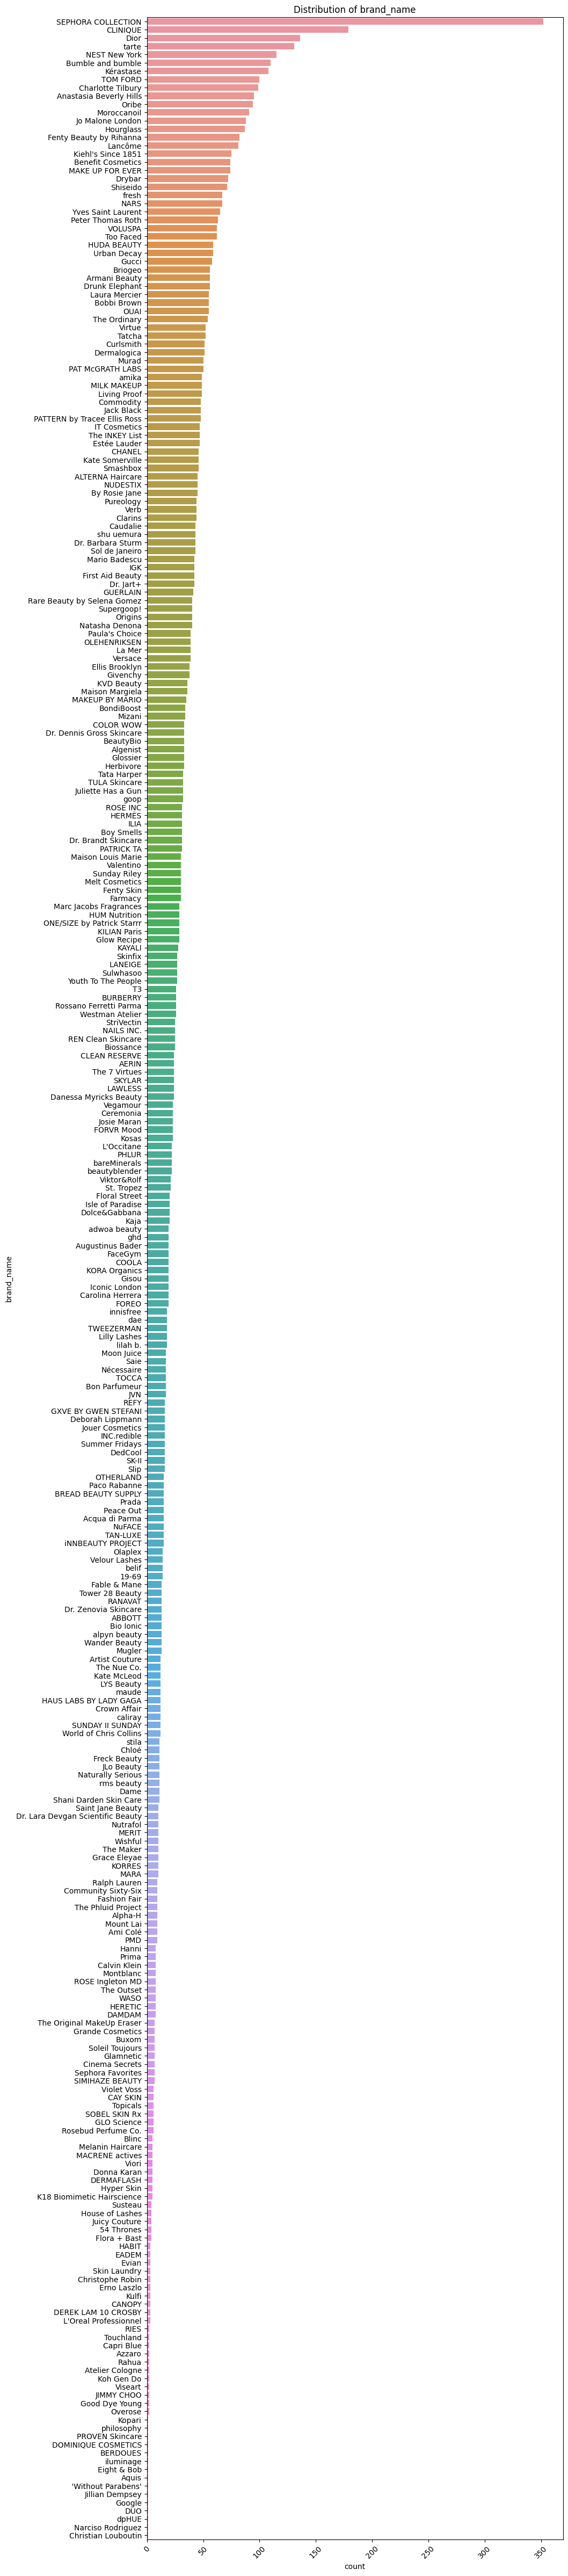

In [ ]:
explor_category_attr(df_product_info,"brand_name")

+-----------------+-----+
| primary_category|count|
+-----------------+-----+
|         Skincare| 2420|
|           Makeup| 2366|
|             Hair| 1463|
|        Fragrance| 1432|
|      Bath & Body|  405|
|        Mini Size|  288|
|              Men|   60|
|  Tools & Brushes|   52|
|            Gifts|    4|
|             null|    2|
|   'Long-wearing'|    2|
| 'All Hair Types'|    1|
+-----------------+-----+



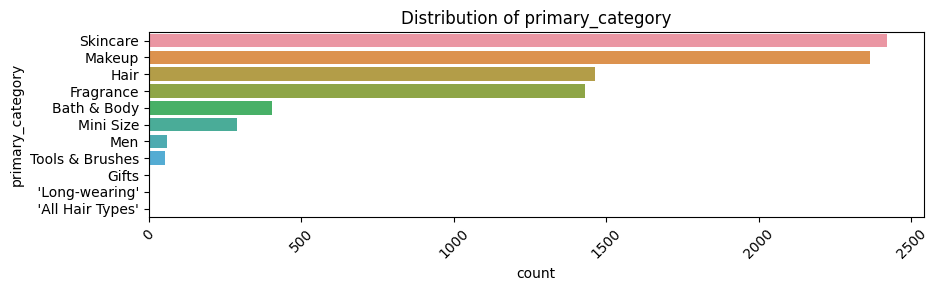

In [ ]:
explor_category_attr(df_product_info,"primary_category")

+--------------------+-----+
|      variation_type|count|
+--------------------+-----+
|                Size| 4043|
|               Color| 1700|
|                null| 1444|
|Size + Concentrat...| 1173|
|                Type|   88|
|               Scent|   30|
|Size + Concentration|   11|
|         Formulation|    5|
|                   0|    1|
+--------------------+-----+



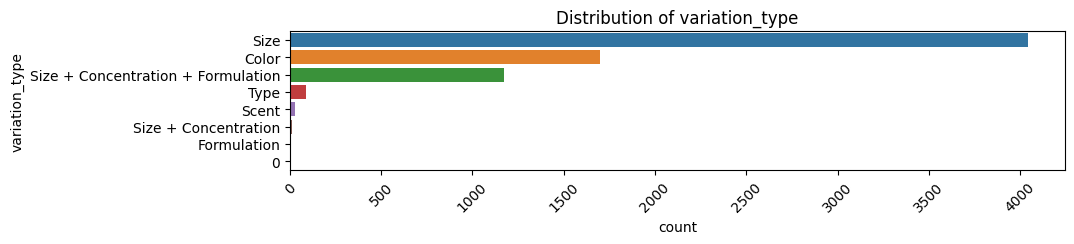

In [ ]:
explor_category_attr(df_product_info,"variation_type")

### A full data report for all attributes

In [ ]:
ProfileReport(df_product_info)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Calculate the correlation matrix

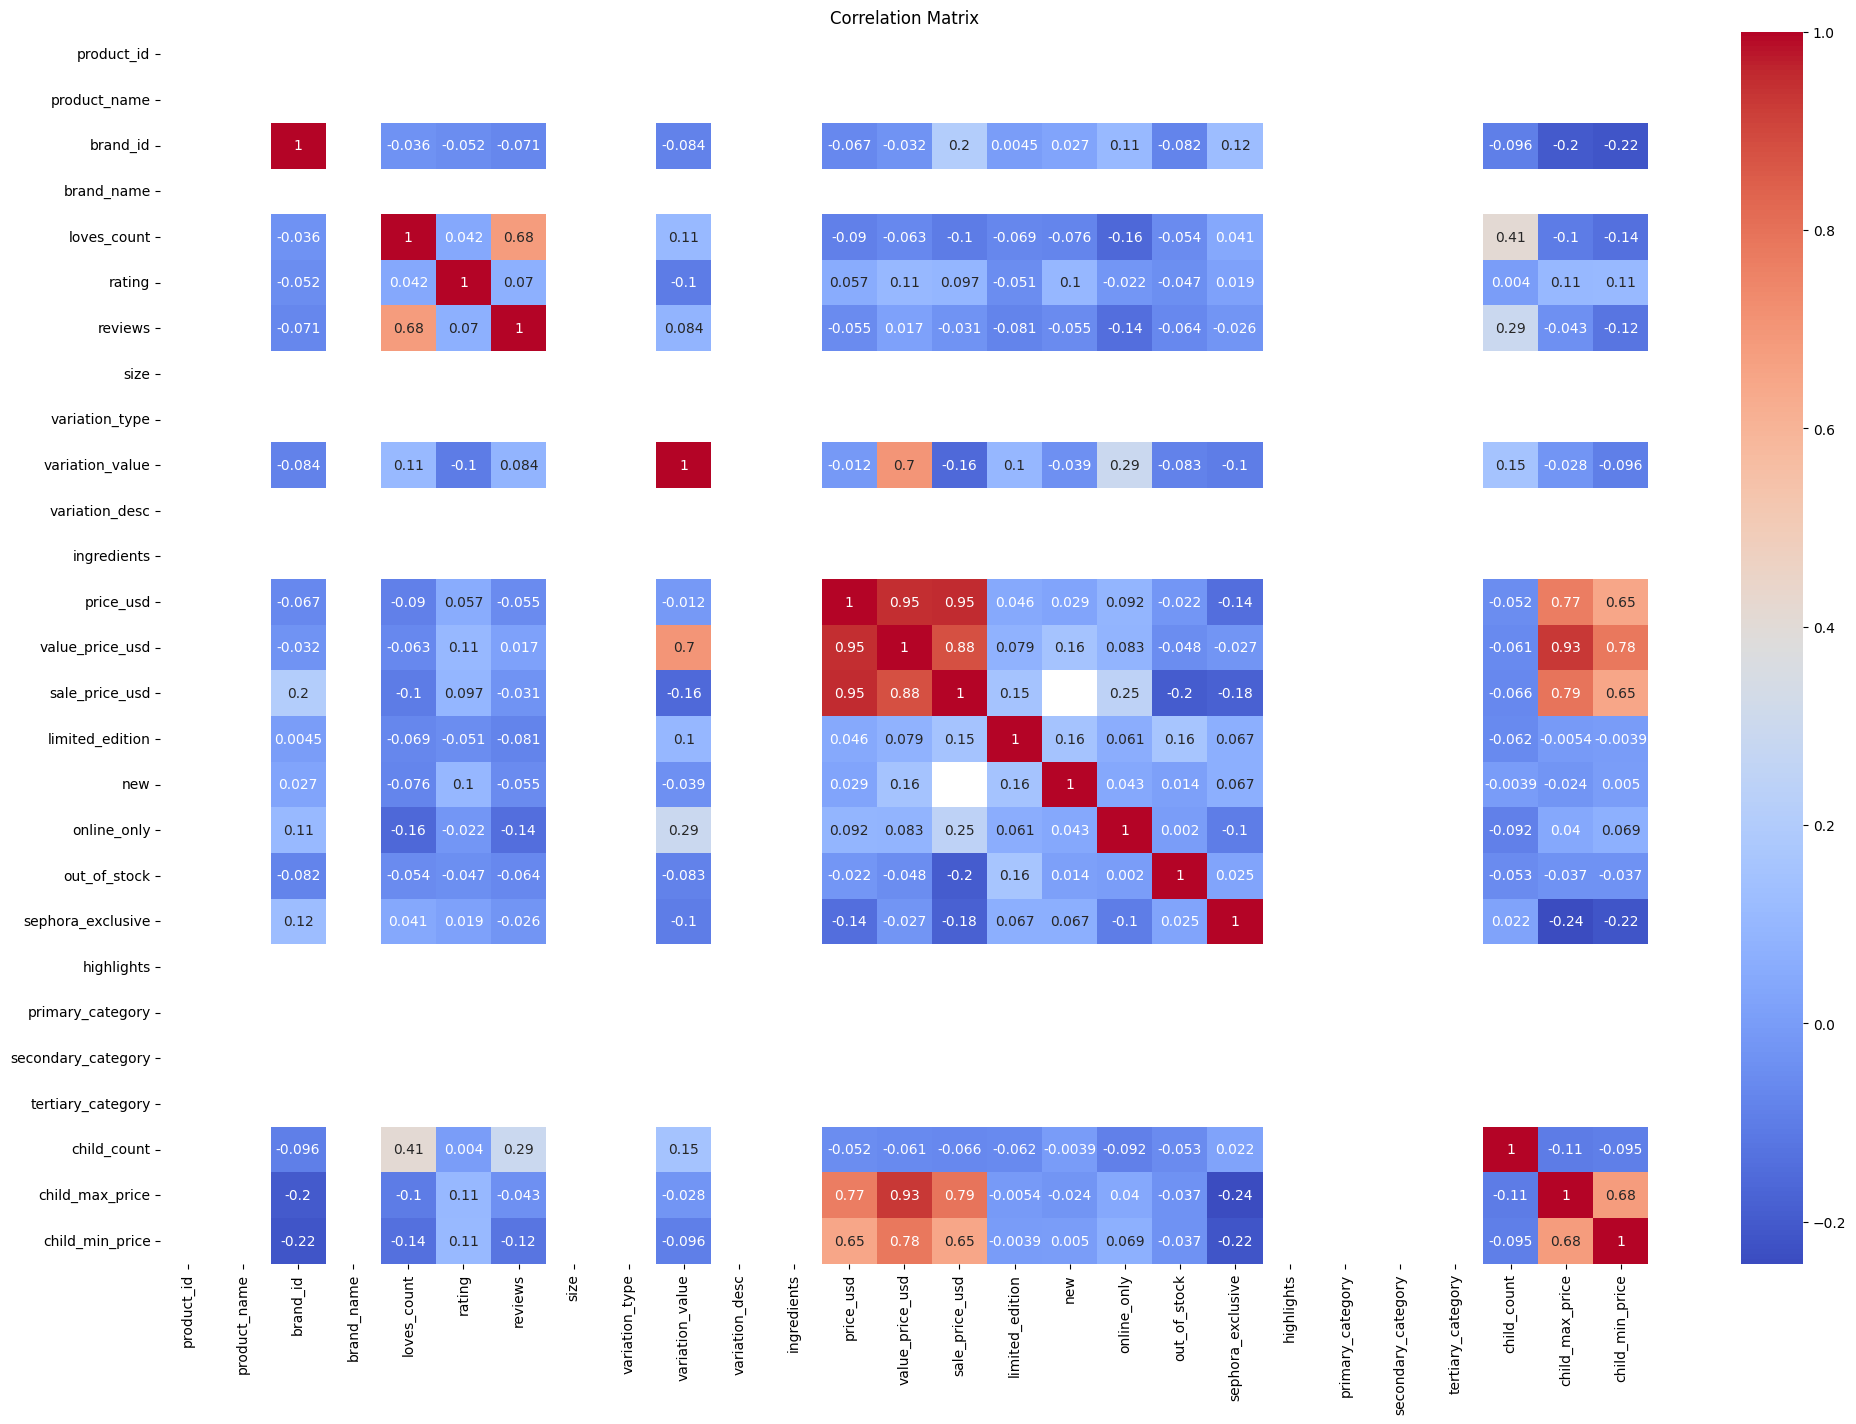

In [ ]:

correlation_matrix = df_product_info.select(
    [col(c).cast('float') for c in df_product_info.columns]
).toPandas().corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(24, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Section 2: Clean the data

10 points

Not every dataset is going to be ready to use right away. Take steps to fix incorrect inputs, remove null values, and assign datatypes that fit each feature.

### This section should include one or more of the following:
- A count of rows before and after dropping data with null or incorrect values, including an explaination of why removing the rows was necessary in [markdown](https://www.markdownguide.org/cheat-sheet).
- Renaming a column, adding a new one, or casting an existing one as a different datatype.
- Remove punctuation marks, symbols, etc from the data, and convert all upper-case lettering to lower-case.
- Remove or fix rows that have bad values/data.

## Select the data we are going to use to train the model on

### Select the desired columns from df_product_info

The following information pertains to the columns I have selected for further analysis from the product information dataset:

- I have chosen to include only the columns with category ID, rather than category name. This is done to avoid potential duplication of names.

- Since our objective is to predict the price in USD, I have omitted the other column containing price. This is to prevent any potential data leaks.

In [ ]:
df_product_info_sub = df_product_info.select("product_id", "brand_id", "loves_count", "rating", "reviews", "size", "ingredients", "price_usd", "limited_edition", "new", "online_only", "out_of_stock", "sephora_exclusive", "primary_category", "secondary_category", "tertiary_category")
df_product_info_sub.show(5)


+----------+--------+-----------+------+-------+--------------+--------------------+---------+---------------+---+-----------+------------+-----------------+----------------+------------------+-----------------+
|product_id|brand_id|loves_count|rating|reviews|          size|         ingredients|price_usd|limited_edition|new|online_only|out_of_stock|sephora_exclusive|primary_category|secondary_category|tertiary_category|
+----------+--------+-----------+------+-------+--------------+--------------------+---------+---------------+---+-----------+------------+-----------------+----------------+------------------+-----------------+
|   P473671|    6342|       6320|3.6364|     11|          null|['Capri Eau de Pa...|     35.0|              0|  0|          1|           0|                0|       Fragrance| Value & Gift Sets|Perfume Gift Sets|
|   P473668|    6342|       3827|4.1538|     13|3.4 oz/ 100 mL|['Alcohol Denat. ...|    195.0|              0|  0|          1|           0|             

## Select the desired columns from df_reviews

We only need the comment column, the original product id, and the helpfulness column from this dataframe. We will conduct a quick sentiment analysis on each comment, weigh each comment using the helpfulness score, and calculate the average comment attitude. Finally, we will merge the results back into the original dataframe using the product id.

In [ ]:
df_reviews_sub = df_reviews.select("helpfulness", "review_text", "product_id")
df_reviews_sub.show(5)

+-----------+--------------------+----------+
|helpfulness|         review_text|product_id|
+-----------+--------------------+----------+
|        1.0|I use this with t...|   P504322|
|       null|I bought this lip...|   P420652|
|       null|My review title s...|   P420652|
|       null|I’ve always loved...|   P420652|
|       null|If you have dry c...|   P420652|
+-----------+--------------------+----------+
only showing top 5 rows



## Remove or proper treat the NA

 ### Count the number of rows before dropping data with null or incorrect values

In [ ]:
print(f"Number of rows in the product info dataframe before dropping na: \n{df_product_info_sub.count()}")
print(f"Number of rows in the reviews dataframe before dropping na: \n{df_reviews_sub.count()}")

Number of rows in the product info dataframe before dropping na: 
8495
Number of rows in the reviews dataframe before dropping na: 
607231


By looking at the EDA report, I found there are 7 columns that contain NA: `rating`, `reviews`, `size`, `ingredients`, `primary_category`, `secondary_category`, and `tertiary_category`. I decided to remove columns that have more than 3 NAs in a row.

In [ ]:
num_na = 3
df_product_info_sub_clean = df_product_info_sub.dropna(thresh=(len(df_product_info_sub.columns)-num_na))
df_product_info_sub_clean.show()

+----------+--------+-----------+------+-------+---------------+--------------------+---------+---------------+---+-----------+------------+-----------------+----------------+------------------+--------------------+
|product_id|brand_id|loves_count|rating|reviews|           size|         ingredients|price_usd|limited_edition|new|online_only|out_of_stock|sephora_exclusive|primary_category|secondary_category|   tertiary_category|
+----------+--------+-----------+------+-------+---------------+--------------------+---------+---------------+---+-----------+------------+-----------------+----------------+------------------+--------------------+
|   P473671|    6342|       6320|3.6364|     11|           null|['Capri Eau de Pa...|     35.0|              0|  0|          1|           0|                0|       Fragrance| Value & Gift Sets|   Perfume Gift Sets|
|   P473668|    6342|       3827|4.1538|     13| 3.4 oz/ 100 mL|['Alcohol Denat. ...|    195.0|              0|  0|          1|         

### Fill na with empty string or 0 depends on their data type

In [ ]:
df_product_info_sub_clean = df_product_info_sub_clean.na.fill(
    {'rating': 0,
     'reviews':0,
     'size':'',
     'ingredients':'',
     'primary_category':'',
     'secondary_category':'',
     'tertiary_category':''})

### Change the data type of certain columns to numeric

In [ ]:
df_product_info_sub_clean = df_product_info_sub_clean.withColumn("brand_id", df_product_info_sub_clean["brand_id"].cast('int'))
df_product_info_sub_clean = df_product_info_sub_clean.withColumn("loves_count", df_product_info_sub_clean["loves_count"].cast('double'))
df_product_info_sub_clean = df_product_info_sub_clean.withColumn("rating", df_product_info_sub_clean["rating"].cast('double'))
df_product_info_sub_clean = df_product_info_sub_clean.withColumn("reviews", df_product_info_sub_clean["reviews"].cast('double'))

In [ ]:
df_product_info_sub_clean.printSchema()

root
 |-- product_id: string (nullable = true)
 |-- brand_id: integer (nullable = true)
 |-- loves_count: double (nullable = true)
 |-- rating: double (nullable = true)
 |-- reviews: double (nullable = true)
 |-- size: string (nullable = false)
 |-- ingredients: string (nullable = false)
 |-- price_usd: double (nullable = true)
 |-- limited_edition: integer (nullable = true)
 |-- new: integer (nullable = true)
 |-- online_only: integer (nullable = true)
 |-- out_of_stock: integer (nullable = true)
 |-- sephora_exclusive: integer (nullable = true)
 |-- primary_category: string (nullable = false)
 |-- secondary_category: string (nullable = false)
 |-- tertiary_category: string (nullable = false)



### Remove rows with review_text is na or being too short

The review would be useless if it does not contain enough content or is empty. Therefore, I have decided to remove any columns that have an empty comment or a comment with a length of less than 10.

In [ ]:
df_reviews_sub.count()

607231

In [ ]:
df_reviews_sub_clean = df_reviews_sub.filter(col("review_text").isNotNull())
df_reviews_sub_clean = df_reviews_sub.filter(length(col("review_text")) >10)
# remove text being too long to reduce the time of sentiment analysis
df_reviews_sub_clean = df_reviews_sub.filter(length(col("review_text")) < 512)
df_reviews_sub_clean.show(10)

+-----------+--------------------+----------+
|helpfulness|         review_text|product_id|
+-----------+--------------------+----------+
|        1.0|I use this with t...|   P504322|
|       null|I bought this lip...|   P420652|
|       null|My review title s...|   P420652|
|       null|I’ve always loved...|   P420652|
|       null|If you have dry c...|   P420652|
|        1.0|The scent isn’t m...|   P420652|
|       0.25|I’ll give this 2 ...|   P420652|
|       null|I use this at nig...|   P420652|
|        1.0|I love this stuff...|   P420652|
|        1.0|I purchased the S...|   P420652|
+-----------+--------------------+----------+
only showing top 10 rows



In [ ]:
df_reviews_sub_clean.count()

518468

The helpfulness score is null when there is no vote on this review. Therefore, I will assign a general score that is neither good nor bad, which will be 0.5.

In [ ]:
df_reviews_sub_clean = df_reviews_sub_clean.na.fill({'helpfulness': 0.5})
df_reviews_sub_clean.show(10)

+-----------+--------------------+----------+
|helpfulness|         review_text|product_id|
+-----------+--------------------+----------+
|        1.0|I use this with t...|   P504322|
|        0.5|I bought this lip...|   P420652|
|        0.5|My review title s...|   P420652|
|        0.5|I’ve always loved...|   P420652|
|        0.5|If you have dry c...|   P420652|
|        1.0|The scent isn’t m...|   P420652|
|       0.25|I’ll give this 2 ...|   P420652|
|        0.5|I use this at nig...|   P420652|
|        1.0|I love this stuff...|   P420652|
|        1.0|I purchased the S...|   P420652|
+-----------+--------------------+----------+
only showing top 10 rows



### Count the number of rows after dropping data with null or incorrect values

In [ ]:
print(f"Number of rows in the product info dataframe before dropping na: \n{df_product_info_sub_clean.count()}")
print(f"Number of rows in the reviews dataframe before dropping na: \n{df_reviews_sub_clean.count()}")

Number of rows in the product info dataframe before dropping na: 
8412
Number of rows in the reviews dataframe before dropping na: 
518468


# Section 3: Transform the clean data

10 points

Once you have clean data, start to prepare it to fit your analysis tools. This might mean using custom code to normalize certain values, joining supplemental datasets, and/or preparing it for machine learning.

### This section should include one or more of the following:
- Write a UDF to perform a function, then use it to add a new column to your data. Explain why in [markdown](https://www.markdownguide.org/cheat-sheet)
- Join an outside data source. (It can be one you've prepared alongside the primary source you're using, as long as you link it)
- Split the data into train/test sets
- Create vectors for relavent features
- One-hot encode catagorical variables

## Transform data

### Transform the size column

In [ ]:
df_product_info_sub_clean.select('size').distinct().collect()

[Row(size='1.5 oz / 45 mL'),
 Row(size='0.07 oz'),
 Row(size='0.2 oz/ 6mL'),
 Row(size='1.08 oz/ 32 mL'),
 Row(size='7 Individual Masks'),
 Row(size='0.1 oz / 3 g'),
 Row(size='0.02 oz/ 0.6 mL'),
 Row(size='1.7 oz / 50 mL Spray'),
 Row(size='0.26 oz/ 7.3 g'),
 Row(size='0.15 oz/ 4.5 g Refill'),
 Row(size='0.22 oz/ 6.25 g'),
 Row(size='8 oz / 236 mL'),
 Row(size='0.11 Fl. Oz/ 3.5 mL'),
 Row(size='0.51 oz/ 14.5 g'),
 Row(size='8.1 oz/ 240 mL'),
 Row(size='0.25 oz / 75 g'),
 Row(size='60 capsules'),
 Row(size='Mini NuFace / Sunset Blush'),
 Row(size='50 mL'),
 Row(size='0.37 oz/ 10 mL'),
 Row(size='0.41 fl oz/ 12 mL'),
 Row(size='10 oz / 300 mL'),
 Row(size='.7 oz / 20 mL'),
 Row(size='100 mL'),
 Row(size='3-Well Palette'),
 Row(size='0.005 oz / 0.16 mL'),
 Row(size='5.4 oz/ 205 mL'),
 Row(size='8 oz / 236.6 mL'),
 Row(size='Liner - .01 oz / .32 g Setter - .14 oz / 4 mL'),
 Row(size='1 Pair'),
 Row(size='0.3 oz/ 10mL'),
 Row(size='pencil : 0.0017 oz/ 0.05 g; gel: 0.0253 oz/ 0.75 mL'),
 Ro

I noticed that most of the sizes mentioned in this column are measured in ounces, so I will extract only the numerical part of the sizes labeled with ounces and disregard the rest.

In [ ]:
def extract_oz(text):
  try:
    if text is None:
      return 0.0
    quants = q_parser.parse(text)

    for q in quants:
      # print(q.unit.name)
      if q.unit.name == "ounce":
        return q.value

    # return 0 if no applicable volume
    return 0.0
  except:
    # The package quantulum3 got an error when calling stemmer
    # skip this one when this occur
    return 0.0


In [ ]:
udf_extract_oz = udf(lambda x: extract_oz(x), DoubleType())
df_product_info_sub_clean = df_product_info_sub_clean.withColumn("size_numeric", udf_extract_oz(df_product_info_sub_clean["size"]))
df_product_info_sub_clean.show()

+----------+--------+-----------+------+-------+---------------+--------------------+---------+---------------+---+-----------+------------+-----------------+----------------+------------------+--------------------+------------+
|product_id|brand_id|loves_count|rating|reviews|           size|         ingredients|price_usd|limited_edition|new|online_only|out_of_stock|sephora_exclusive|primary_category|secondary_category|   tertiary_category|size_numeric|
+----------+--------+-----------+------+-------+---------------+--------------------+---------+---------------+---+-----------+------------+-----------------+----------------+------------------+--------------------+------------+
|   P473671|    6342|     6320.0|3.6364|   11.0|               |['Capri Eau de Pa...|     35.0|              0|  0|          1|           0|                0|       Fragrance| Value & Gift Sets|   Perfume Gift Sets|         0.0|
|   P473668|    6342|     3827.0|4.1538|   13.0| 3.4 oz/ 100 mL|['Alcohol Denat. ...

### Transform the tag columns `ingredients`

In [ ]:
df_product_info_sub_clean.show(5)

+----------+--------+-----------+------+-------+--------------+--------------------+---------+---------------+---+-----------+------------+-----------------+----------------+------------------+-----------------+------------+
|product_id|brand_id|loves_count|rating|reviews|          size|         ingredients|price_usd|limited_edition|new|online_only|out_of_stock|sephora_exclusive|primary_category|secondary_category|tertiary_category|size_numeric|
+----------+--------+-----------+------+-------+--------------+--------------------+---------+---------------+---+-----------+------------+-----------------+----------------+------------------+-----------------+------------+
|   P473671|    6342|     6320.0|3.6364|   11.0|              |['Capri Eau de Pa...|     35.0|              0|  0|          1|           0|                0|       Fragrance| Value & Gift Sets|Perfume Gift Sets|         0.0|
|   P473668|    6342|     3827.0|4.1538|   13.0|3.4 oz/ 100 mL|['Alcohol Denat. ...|    195.0|      

In [ ]:
def str_to_array(x):
  if x != '' :
    ls_in = ast.literal_eval(x)
    ls_out = []
    for obj in ls_in:
      ls_out.append(re.sub('[^a-z0-9 ]+', '', obj.lower()))
    return ls_out
  else:
     return ['']


udf_array = udf(lambda x: str_to_array(x), ArrayType(StringType()))

df_product_info_sub_clean = df_product_info_sub_clean.withColumn("ingredients_tokens", udf_array(df_product_info_sub_clean["ingredients"]))
df_product_info_sub_clean.show(5)

+----------+--------+-----------+------+-------+--------------+--------------------+---------+---------------+---+-----------+------------+-----------------+----------------+------------------+-----------------+------------+--------------------+
|product_id|brand_id|loves_count|rating|reviews|          size|         ingredients|price_usd|limited_edition|new|online_only|out_of_stock|sephora_exclusive|primary_category|secondary_category|tertiary_category|size_numeric|  ingredients_tokens|
+----------+--------+-----------+------+-------+--------------+--------------------+---------+---------------+---+-----------+------------+-----------------+----------------+------------------+-----------------+------------+--------------------+
|   P473671|    6342|     6320.0|3.6364|   11.0|              |['Capri Eau de Pa...|     35.0|              0|  0|          1|           0|                0|       Fragrance| Value & Gift Sets|Perfume Gift Sets|         0.0|[capri eau de par...|
|   P473668|    

In [ ]:
cv_ingredients = CountVectorizer(inputCol="ingredients_tokens", outputCol="ingredients_feature", vocabSize=1000000).fit(df_product_info_sub_clean)
df_product_info_sub_clean = cv_ingredients.transform(df_product_info_sub_clean)

df_product_info_sub_clean.show()

+----------+--------+-----------+------+-------+---------------+--------------------+---------+---------------+---+-----------+------------+-----------------+----------------+------------------+--------------------+------------+--------------------+--------------------+
|product_id|brand_id|loves_count|rating|reviews|           size|         ingredients|price_usd|limited_edition|new|online_only|out_of_stock|sephora_exclusive|primary_category|secondary_category|   tertiary_category|size_numeric|  ingredients_tokens| ingredients_feature|
+----------+--------+-----------+------+-------+---------------+--------------------+---------+---------------+---+-----------+------------+-----------------+----------------+------------------+--------------------+------------+--------------------+--------------------+
|   P473671|    6342|     6320.0|3.6364|   11.0|               |['Capri Eau de Pa...|     35.0|              0|  0|          1|           0|                0|       Fragrance| Value & Gif

## One hot encoding the categorical columns

In [ ]:
df_product_info_sub_clean.show()

+----------+--------+-----------+------+-------+---------------+--------------------+---------+---------------+---+-----------+------------+-----------------+----------------+------------------+--------------------+------------+--------------------+--------------------+
|product_id|brand_id|loves_count|rating|reviews|           size|         ingredients|price_usd|limited_edition|new|online_only|out_of_stock|sephora_exclusive|primary_category|secondary_category|   tertiary_category|size_numeric|  ingredients_tokens| ingredients_feature|
+----------+--------+-----------+------+-------+---------------+--------------------+---------+---------------+---+-----------+------------+-----------------+----------------+------------------+--------------------+------------+--------------------+--------------------+
|   P473671|    6342|     6320.0|3.6364|   11.0|               |['Capri Eau de Pa...|     35.0|              0|  0|          1|           0|                0|       Fragrance| Value & Gif

###Create dummy variables using OneHotEncoder

In [ ]:
udf_transform_empty = udf(lambda s: "NA" if s == "" else s, StringType())
for category in ["primary_category", "secondary_category", "tertiary_category"]:
    df_product_info_sub_clean = df_product_info_sub_clean.withColumn(category, udf_transform_empty(category))
indexers = StringIndexer(inputCols=["primary_category", "secondary_category", "tertiary_category"], outputCols=["primary_category_index", "secondary_category_index", "tertiary_category_index"])
df_product_info_sub_clean = indexers.fit(df_product_info_sub_clean).transform(df_product_info_sub_clean)

encoder = OneHotEncoder(inputCols=["primary_category_index", "secondary_category_index", "tertiary_category_index"], outputCols=["primary_category_encoded", "secondary_category_encoded", "tertiary_category_encoded"])
df_product_info_sub_clean = encoder.fit(df_product_info_sub_clean).transform(df_product_info_sub_clean)
df_product_info_sub_clean.show(5)


+----------+--------+-----------+------+-------+--------------+--------------------+---------+---------------+---+-----------+------------+-----------------+----------------+------------------+-----------------+------------+--------------------+--------------------+----------------------+------------------------+-----------------------+------------------------+--------------------------+-------------------------+
|product_id|brand_id|loves_count|rating|reviews|          size|         ingredients|price_usd|limited_edition|new|online_only|out_of_stock|sephora_exclusive|primary_category|secondary_category|tertiary_category|size_numeric|  ingredients_tokens| ingredients_feature|primary_category_index|secondary_category_index|tertiary_category_index|primary_category_encoded|secondary_category_encoded|tertiary_category_encoded|
+----------+--------+-----------+------+-------+--------------+--------------------+---------+---------------+---+-----------+------------+-----------------+---------

## Sentimental analysis on the comment

### Calculate sentiment score with transformer

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
df_reviews_sub_clean.show(5)

+-----------+--------------------+----------+
|helpfulness|         review_text|product_id|
+-----------+--------------------+----------+
|        1.0|I use this with t...|   P504322|
|        0.5|I bought this lip...|   P420652|
|        0.5|My review title s...|   P420652|
|        0.5|I’ve always loved...|   P420652|
|        0.5|If you have dry c...|   P420652|
+-----------+--------------------+----------+
only showing top 5 rows



In [ ]:
def quick_sentiment(x):
  sentiment = sentiment_pipeline(x)[0]
  if sentiment.get('label') == 'NEGATIVE':
    return sentiment.get('score') * -1
  else:
    return sentiment.get('score')


A negative sentiment would be represented as -1, while a positive sentiment would be represented as 1.

In [ ]:
udf_sentiment = udf(lambda x: quick_sentiment(x), DoubleType())


df_reviews_sub_clean = df_reviews_sub_clean.withColumn("review_sentiment", udf_sentiment(df_reviews_sub_clean["review_text"]))
df_reviews_sub_clean.show(5)

+-----------+--------------------+----------+-------------------+
|helpfulness|         review_text|product_id|   review_sentiment|
+-----------+--------------------+----------+-------------------+
|        1.0|I use this with t...|   P504322| 0.9981277585029602|
|        0.5|I bought this lip...|   P420652|-0.9995213747024536|
|        0.5|My review title s...|   P420652|-0.9977084398269653|
|        0.5|I’ve always loved...|   P420652| 0.9996782541275024|
|        0.5|If you have dry c...|   P420652| 0.9930551648139954|
+-----------+--------------------+----------+-------------------+
only showing top 5 rows



### Time the sentimental score with the rate of helpfulness as a weight

In [ ]:
df_reviews_sub_clean.printSchema()

root
 |-- helpfulness: string (nullable = false)
 |-- review_text: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- review_sentiment: double (nullable = true)



In [ ]:
df_reviews_sub_clean = df_reviews_sub_clean.withColumn("review_sentiment_weighted", col("helpfulness") * col("review_sentiment"))
df_reviews_sub_clean.show(5)

+-----------+--------------------+----------+-------------------+-------------------------+
|helpfulness|         review_text|product_id|   review_sentiment|review_sentiment_weighted|
+-----------+--------------------+----------+-------------------+-------------------------+
|        1.0|I use this with t...|   P504322| 0.9981277585029602|       0.9981277585029602|
|        0.5|I bought this lip...|   P420652|-0.9995213747024536|      -0.4997606873512268|
|        0.5|My review title s...|   P420652|-0.9977084398269653|     -0.49885421991348267|
|        0.5|I’ve always loved...|   P420652| 0.9996782541275024|       0.4998391270637512|
|        0.5|If you have dry c...|   P420652| 0.9930551648139954|       0.4965275824069977|
+-----------+--------------------+----------+-------------------+-------------------------+
only showing top 5 rows



In [ ]:
df_sentiment = df_reviews_sub_clean.select("product_id","review_sentiment_weighted")
df_sentiment.show(5)
df_sentiment.printSchema()

+----------+-------------------------+
|product_id|review_sentiment_weighted|
+----------+-------------------------+
|   P504322|       0.9981277585029602|
|   P420652|      -0.4997606873512268|
|   P420652|     -0.49885421991348267|
|   P420652|       0.4998391270637512|
|   P420652|       0.4965275824069977|
+----------+-------------------------+
only showing top 5 rows

root
 |-- product_id: string (nullable = true)
 |-- review_sentiment_weighted: double (nullable = true)



### Group the sentiment scores by product ID

In [ ]:
df_avg_sentiment = df_sentiment.groupBy("product_id").agg(avg("review_sentiment_weighted").alias("avg_sentiment"))
df_avg_sentiment.show()

+----------+------------------+
|product_id|     avg_sentiment|
+----------+------------------+
|   P420652|0.3209570469970995|
|   P504322|0.9981277585029602|
+----------+------------------+



### Merge the weighted average sentiment score with the product information dataframe

In [ ]:
df_product_info_sub_clean = df_product_info_sub_clean.join(df_avg_sentiment, "product_id", "left")
df_product_info_sub_clean = df_product_info_sub_clean.na.fill({'avg_sentiment':0})
df_product_info_sub_clean.show()

+----------+--------+-----------+------+-------+---------------+--------------------+---------+---------------+---+-----------+------------+-----------------+----------------+------------------+--------------------+------------+--------------------+--------------------+----------------------+------------------------+-----------------------+------------------------+--------------------------+-------------------------+-------------+
|product_id|brand_id|loves_count|rating|reviews|           size|         ingredients|price_usd|limited_edition|new|online_only|out_of_stock|sephora_exclusive|primary_category|secondary_category|   tertiary_category|size_numeric|  ingredients_tokens| ingredients_feature|primary_category_index|secondary_category_index|tertiary_category_index|primary_category_encoded|secondary_category_encoded|tertiary_category_encoded|avg_sentiment|
+----------+--------+-----------+------+-------+---------------+--------------------+---------+---------------+---+-----------+---

In [ ]:
df_product_info_sub_clean.printSchema()

root
 |-- product_id: string (nullable = true)
 |-- brand_id: integer (nullable = true)
 |-- loves_count: double (nullable = true)
 |-- rating: double (nullable = true)
 |-- reviews: double (nullable = true)
 |-- size: string (nullable = false)
 |-- ingredients: string (nullable = false)
 |-- price_usd: double (nullable = true)
 |-- limited_edition: integer (nullable = true)
 |-- new: integer (nullable = true)
 |-- online_only: integer (nullable = true)
 |-- out_of_stock: integer (nullable = true)
 |-- sephora_exclusive: integer (nullable = true)
 |-- primary_category: string (nullable = true)
 |-- secondary_category: string (nullable = true)
 |-- tertiary_category: string (nullable = true)
 |-- size_numeric: double (nullable = true)
 |-- ingredients_tokens: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- ingredients_feature: vector (nullable = true)
 |-- primary_category_index: double (nullable = false)
 |-- secondary_category_index: double (nullable = fal

## Assemble feature vector

In [ ]:
assembler = VectorAssembler(inputCols=["brand_id","loves_count","rating","reviews","limited_edition","new","online_only","out_of_stock","out_of_stock","sephora_exclusive","size_numeric","ingredients_feature","primary_category_index","secondary_category_index","tertiary_category_index","avg_sentiment"], outputCol="features")
df_assembled = assembler.transform(df_product_info_sub_clean)
df_assembled.show(5)

+----------+--------+-----------+------+-------+--------------+--------------------+---------+---------------+---+-----------+------------+-----------------+----------------+------------------+-----------------+------------+--------------------+--------------------+----------------------+------------------------+-----------------------+------------------------+--------------------------+-------------------------+-------------+--------------------+
|product_id|brand_id|loves_count|rating|reviews|          size|         ingredients|price_usd|limited_edition|new|online_only|out_of_stock|sephora_exclusive|primary_category|secondary_category|tertiary_category|size_numeric|  ingredients_tokens| ingredients_feature|primary_category_index|secondary_category_index|tertiary_category_index|primary_category_encoded|secondary_category_encoded|tertiary_category_encoded|avg_sentiment|            features|
+----------+--------+-----------+------+-------+--------------+--------------------+---------+--

# Section 4: Show your analysis of the data

10 points

This is where the science happens. Use your data to show some kind of insight, and how you got there. Make the reader understand why it's important, and how they can get the same conslusion, and/or what would need to change to reach a different one.

### This section should include one or more of the following:
- Fit the data to a model
- Show the outcome of clustering, regression, and/or classification algorithms.
 - We used several in class, but you can use whatever fits your needs for this assignment
- Reccomend a product/item
- Use a SQL query to filter results


## Select relevant columns for modeling

In [ ]:
df_final = df_assembled.select("features", "price_usd")
df_final.show(5)

+--------------------+---------+
|            features|price_usd|
+--------------------+---------+
|(10877,[0,1,2,3,6...|     35.0|
|(10877,[0,1,2,3,6...|    195.0|
|(10877,[0,1,2,3,6...|    195.0|
|(10877,[0,1,2,3,6...|    195.0|
|(10877,[0,1,2,3,6...|    195.0|
+--------------------+---------+
only showing top 5 rows



## Train test split
Split the data into train and test with 20% of the data in the test sample.

In [ ]:
train_data, test_data = df_final.randomSplit([0.7, 0.3], seed=42)

print("Train data count:", train_data.count())
print("Test data count:", test_data.count())

Train data count: 5972
Test data count: 2440


## Train models

Since the data is already complecated enough, I will just use a simply linear regression to test out the performance.

### Linear regression

Fit the data to a linear regression model

In [ ]:
lr = LinearRegression(featuresCol='features', labelCol='price_usd')
lr_model = lr.fit(train_data)

Evaluate the linear regression model

In [ ]:
lr_predictions = lr_model.transform(train_data)
lr_evaluator = RegressionEvaluator(labelCol="price_usd", predictionCol="prediction", metricName="rmse")
lr_rmse = lr_evaluator.evaluate(lr_predictions)
print("Linear Regression Train RMSE: ", lr_rmse)

Linear Regression Train RMSE:  32.72741086425163


In [ ]:
lr_predictions = lr_model.transform(test_data)
lr_evaluator = RegressionEvaluator(labelCol="price_usd", predictionCol="prediction", metricName="rmse")
lr_rmse = lr_evaluator.evaluate(lr_predictions)
print("Linear Regression Test RMSE: ", lr_rmse)

Linear Regression Test RMSE:  56.04322775260472


The root mean square error (RMSE) indicates that there is some level of error in the predictions of the linear regression model. However, considering that it is a very simple model, this level of error is still acceptable.